In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [106]:
input_file = r"C:\Users\starb\OneDrive\Desktop\Firmable_DQ\output\parsed_news_events.csv"

df = pd.read_csv(input_file)

print("File Loaded Successfully ✅")
df.head()

File Loaded Successfully ✅


,event_id,category,summary,award,product,location,effective_date,found_at,confidence,company_name,company_domain
0,49c2548f-7a5b-45e3-9bbc-84477e7fd0d0,partners_with,Unmudl Public Benefit Corp. partnered with Ama...,NaN,NaN,NaN,2022-01-01,2025-02-20T00:00:00Z,1.0000,Unmudl Public Benefit Corp.,unmudl.com
1,49c25f6f-ef44-406e-ba54-37b4530e1642,leaves,"Sean Scott left Amazon.com, Inc. on Dec 6th '20.",NaN,NaN,NaN,2020-12-06,2021-01-06T13:33:31Z,0.7669,"Amazon.com, Inc.",amazon.com
2,49c9867f-4c20-4be9-b11a-e7b8c9a71ccb,identified_as_competitor_of,ReverseLogix Corp. identified as competitor of...,NaN,NaN,NaN,NaN,2020-06-05T05:17:56Z,0.7752,ReverseLogix Corp.,reverselogix.com
3,49cd397d-1fa6-4c20-beb5-622d9ec185c3,partners_with,"Harness Inc. partnered with Amazon.com, Inc. o...",NaN,NaN,NaN,2019-03-23,2019-04-23T09:00:11Z,0.7494,Harness Inc.,harness.io
4,49d417d9-2798-45cb-a208-52ed65329797,partners_with,"Warner Bros partnered with Amazon.com, Inc. on...",NaN,NaN,NaN,2018-12-03,2017-11-13T11:07:08Z,0.6617,Warner Bros,warnerarchive.com


data overview

In [107]:
print("\n📈 Numerical Feature Summary:")
num_summary = df.describe(include='number').transpose()
num_summary["Missing %"] = round((df[num_summary.index].isna().mean() * 100), 2)
display(num_summary)


📈 Numerical Feature Summary:


,count,mean,std,min,25%,50%,75%,max,Missing %
confidence,620777.0,0.603385,0.270955,0.0,0.4487,0.6481,0.7987,1.0,0.0


In [108]:
print("\n🔠 Categorical Feature Summary:")
cat_summary = df.describe(include='object').transpose()
cat_summary["Missing %"] = round((df[cat_summary.index].isna().mean() * 100), 2)
display(cat_summary)


🔠 Categorical Feature Summary:


,count,unique,top,freq,Missing %
event_id,620785,612910,14959015-1530-4880-adaf-f55b011bde45,2,0.00
category,620785,29,launches,199986,0.00
summary,620785,603796,Cambridge invests into assets: interdisciplina...,24,0.00
award,18986,16536,two awards,172,96.94
product,220838,203976,website,535,64.43
location,170460,13642,United States,10419,72.54
effective_date,246590,5562,2021-01-01,4803,60.28
found_at,620785,384036,2023-08-22T22:00:00Z,257,0.00
company_name,620677,91658,"Amazon.com, Inc.",14343,0.02
company_domain,620785,93792,amazon.com,14343,0.00


In [109]:

#completeness
null_percent = df.isnull().mean() * 100
print("📊 % Missing by Column:\n")
print(null_percent.sort_values(ascending=False))


📊 % Missing by Column:

award             96.941614
location          72.541218
product           64.426009
effective_date    60.277713
company_name       0.017397
confidence         0.001289
event_id           0.000000
summary            0.000000
category           0.000000
found_at           0.000000
company_domain     0.000000
dtype: float64


In [110]:
#uniqueness/duplicate rows
total_rows = len(df)
duplicate_rows = df.duplicated().sum()
dup_rate = duplicate_rows / total_rows * 100

print(f"Total Rows: {total_rows}")

Total Rows: 620785


In [111]:
#Validity Checks
df['effective_date'] = pd.to_datetime(df['effective_date'], errors='coerce').dt.date
df['found_at'] = pd.to_datetime(df['found_at'], errors='coerce').dt.date

df[['effective_date','found_at']].head()




,effective_date,found_at
0,2022-01-01,2025-02-20
1,2020-12-06,2021-01-06
2,NaT,2020-06-05
3,2019-03-23,2019-04-23
4,2018-12-03,2017-11-13


In [112]:
#accuracy
invalid_conf = df[(df['confidence'] < 0) | (df['confidence'] > 1)]
invalid_domain = df[~df['company_domain'].str.contains(r"\.", na=False)]

print("Invalid confidence values:", len(invalid_conf))
print("Invalid domains:", len(invalid_domain))
invalid_domain.head()


Invalid confidence values: 0
Invalid domains: 0


,event_id,category,summary,award,product,location,effective_date,found_at,confidence,company_name,company_domain


In [113]:
#consistency
df['domain_company'] = df['company_domain'].str.split('.').str[0].str.lower()
df['name_clean'] = df['company_name'].str.replace(r'[^a-zA-Z ]', '', regex=True).str.lower()

# Row-wise check if domain keyword exists in company name
df['domain_match'] = df.apply(
    lambda row: row['domain_company'] in row['name_clean'] if pd.notna(row['domain_company']) and pd.notna(row['name_clean']) else False,
    axis=1
)

consistency_mismatch = df[df['domain_match'] == False]

consistency_mismatch[['company_name','company_domain']].head()



,company_name,company_domain
4,Warner Bros,warnerarchive.com
9,Illovo Sugar Africa Group,illovosugarafrica.com
11,Kendall Kylie,kendall-kylie.com
20,Navy Federal,navyfederal.org
34,Signature Aviation plc,signatureaviation.com


In [114]:
df.head()

,event_id,category,summary,award,product,location,effective_date,found_at,confidence,company_name,company_domain,domain_company,name_clean,domain_match
0,49c2548f-7a5b-45e3-9bbc-84477e7fd0d0,partners_with,Unmudl Public Benefit Corp. partnered with Ama...,NaN,NaN,NaN,2022-01-01,2025-02-20,1.0000,Unmudl Public Benefit Corp.,unmudl.com,unmudl,unmudl public benefit corp,True
1,49c25f6f-ef44-406e-ba54-37b4530e1642,leaves,"Sean Scott left Amazon.com, Inc. on Dec 6th '20.",NaN,NaN,NaN,2020-12-06,2021-01-06,0.7669,"Amazon.com, Inc.",amazon.com,amazon,amazoncom inc,True
2,49c9867f-4c20-4be9-b11a-e7b8c9a71ccb,identified_as_competitor_of,ReverseLogix Corp. identified as competitor of...,NaN,NaN,NaN,NaT,2020-06-05,0.7752,ReverseLogix Corp.,reverselogix.com,reverselogix,reverselogix corp,True
3,49cd397d-1fa6-4c20-beb5-622d9ec185c3,partners_with,"Harness Inc. partnered with Amazon.com, Inc. o...",NaN,NaN,NaN,2019-03-23,2019-04-23,0.7494,Harness Inc.,harness.io,harness,harness inc,True
4,49d417d9-2798-45cb-a208-52ed65329797,partners_with,"Warner Bros partnered with Amazon.com, Inc. on...",NaN,NaN,NaN,2018-12-03,2017-11-13,0.6617,Warner Bros,warnerarchive.com,warnerarchive,warner bros,False


DATA QUALITY

In [115]:
# Remove duplicate rows
initial_rows = len(df)
df_clean = df.drop_duplicates().copy()
duplicates_removed = initial_rows - len(df_clean)

print(f"ACTION 1: Dropped {duplicates_removed} duplicate row(s).")
print(f"DataFrame now has {len(df_clean)} unique row(s).")

ACTION 1: Dropped 7875 duplicate row(s).
DataFrame now has 612910 unique row(s).


In [116]:
# Threshold for dropping columns (60% missing allowed)
THRESHOLD = 0.60  

# Calculate missing percentage for each column
missing_pct = df_clean.isnull().mean()

print("Missing % per column:")
print((missing_pct * 100).round(2).astype(str) + "%")

# Columns where missing % > 60%
cols_to_drop = missing_pct[missing_pct > THRESHOLD].index.tolist()

# Drop the columns
if cols_to_drop:
    df_clean = df_clean.drop(columns=cols_to_drop)
    print("\nDropped columns (more than 60% missing):", cols_to_drop)
else:
    print("\nNo columns crossed the 60% missing threshold.")


Missing % per column:
event_id            0.0%
category            0.0%
summary             0.0%
award              96.9%
product           63.97%
location          72.56%
effective_date    60.21%
found_at            0.0%
confidence          0.0%
company_name       0.02%
company_domain      0.0%
domain_company      0.0%
name_clean         0.02%
domain_match        0.0%
dtype: object

Dropped columns (more than 60% missing): ['award', 'product', 'location', 'effective_date']


In [117]:
CONFIDENCE_THRESHOLD = 0.50 # Rows with confidence < 50% (0.50) will be dropped

# Cell 4: Step 3 - Drop Low Confidence Rows

# Identify and count rows to be dropped
low_confidence_rows = len(df_clean[df_clean['confidence'] < CONFIDENCE_THRESHOLD])

# 3. Use boolean indexing to keep only rows where confidence is >= the threshold
df_clean = df_clean[df_clean['confidence'] >= CONFIDENCE_THRESHOLD].copy()

print(f"STEP 3 (Validity): Dropped {low_confidence_rows} row(s) with confidence < {CONFIDENCE_THRESHOLD*100}%.")
print(f"Final row count: {len(df_clean)}")

STEP 3 (Validity): Dropped 183711 row(s) with confidence < 50.0%.
Final row count: 429191


In [118]:
missing_pct1 = df_clean.isnull().mean() * 100
missing_pct1.round(2)


event_id          0.00
category          0.00
summary           0.00
found_at          0.00
confidence        0.00
company_name      0.01
company_domain    0.00
domain_company    0.00
name_clean        0.01
domain_match      0.00
dtype: float64

In [119]:
cols_to_impute = ["company_name", "name_clean"]  # columns you want to fill

df_clean[cols_to_impute] = df_clean[cols_to_impute].fillna("Unknown")


In [120]:
df_clean.head(1)

,event_id,category,summary,found_at,confidence,company_name,company_domain,domain_company,name_clean,domain_match
0,49c2548f-7a5b-45e3-9bbc-84477e7fd0d0,partners_with,Unmudl Public Benefit Corp. partnered with Ama...,2025-02-20,1.0,Unmudl Public Benefit Corp.,unmudl.com,unmudl,unmudl public benefit corp,True


In [121]:
# 2. Analyze the frequency of each category
category_counts = df_clean['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Event Count']

# 3. Calculate the percentage of total events for each category
total_events = category_counts['Event Count'].sum()
category_counts['Percentage'] = (category_counts['Event Count'] / total_events) * 100

# Sort results by count (highest first)
category_counts = category_counts.sort_values(by='Event Count', ascending=False)


# Cell 4: Display Results and Insights

print("--- Event Category Frequency Analysis (Top Strategic Focus) ---")
print("The event counts and percentages show the primary activities tracked in the dataset.")

# Display the top categories formatted nicely
display(category_counts.style.format({'Percentage': '{:.2f}%'}))

# Example Interpretation
print("\nInsight Interpretation:")
print(f"- The dominant category is '{category_counts['Category'].iloc[0]}', accounting for {category_counts['Percentage'].iloc[0]:.2f}% of all events.")
print("- This suggests a primary focus on external alliances and ecosystem expansion.")

--- Event Category Frequency Analysis (Top Strategic Focus) ---
The event counts and percentages show the primary activities tracked in the dataset.


,Category,Event Count,Percentage
0,launches,158866,37.02%
1,partners_with,70814,16.50%
2,hires,48318,11.26%
3,recognized_as,20124,4.69%
4,is_developing,15872,3.70%
5,invests_into,15457,3.60%
6,receives_award,14842,3.46%
7,acquires,9329,2.17%
8,invests_into_assets,9019,2.10%
9,has_issues_with,8019,1.87%



Insight Interpretation:
- The dominant category is 'launches', accounting for 37.02% of all events.
- This suggests a primary focus on external alliances and ecosystem expansion.


C:\Users\starb\AppData\Local\Temp\ipykernel_10024\4262307166.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


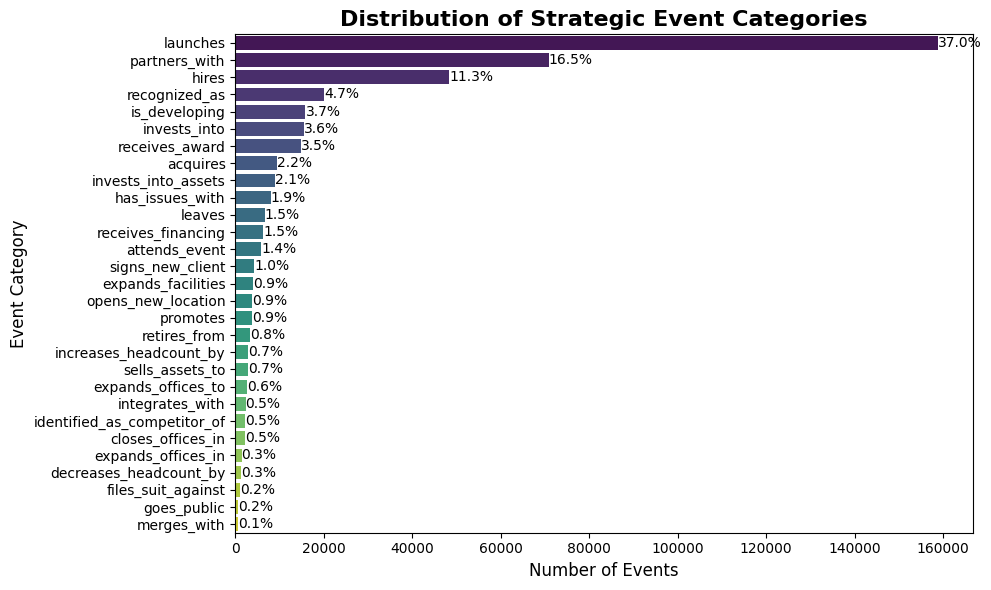


--- Insight Table (Top Categories) ---


,Category,Event_Count,Percentage
0,launches,158866,37.02%
1,partners_with,70814,16.50%
2,hires,48318,11.26%
3,recognized_as,20124,4.69%
4,is_developing,15872,3.70%
5,invests_into,15457,3.60%
6,receives_award,14842,3.46%
7,acquires,9329,2.17%
8,invests_into_assets,9019,2.10%
9,has_issues_with,8019,1.87%


In [122]:
# Cell 3: Category Frequency Calculation and Visualization

# --- 1. Calculate Frequency ---
# Group by category and count occurrences
category_counts = df_clean['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Event_Count']

# Calculate the percentage for the tooltip/label
total_events = category_counts['Event_Count'].sum()
category_counts['Percentage'] = (category_counts['Event_Count'] / total_events) * 100

# Sort by count for cleaner visualization
category_counts = category_counts.sort_values(by='Event_Count', ascending=False)


# --- 2. Visualization (Bar Chart) ---
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(
    x='Event_Count', 
    y='Category', 
    data=category_counts, 
    palette="viridis"
)

# Add labels and title
plt.title('Distribution of Strategic Event Categories', fontsize=16, fontweight='bold')
plt.xlabel('Number of Events', fontsize=12)
plt.ylabel('Event Category', fontsize=12)

# Add the percentage labels to the right of the bars
for p in ax.patches:
    width = p.get_width()
    percentage = f'{width / total_events * 100:.1f}%'
    ax.text(width + 0.5, # Position x slightly past the bar
            p.get_y() + p.get_height() / 2, # Position y at the center of the bar
            percentage, 
            ha='left', 
            va='center',
            fontsize=10)

plt.tight_layout()
plt.show()

print("\n--- Insight Table (Top Categories) ---")
display(category_counts.style.format({'Percentage': '{:.2f}%'}))

In [123]:
theme_mapping = {
    # Product & Innovation
    'launches': 'Product & Innovation',
    'is_developing': 'Product & Innovation',
    
    # External Alignment & M&A
    'partners_with': 'External Alignment & M&A',
    'merges_with': 'External Alignment & M&A',
    'integrates_with': 'External Alignment & M&A',
    'acquires': 'External Alignment & M&A',
    
    # Talent & HR
    'hires': 'Talent & HR',
    'promotes': 'Talent & HR',
    'leaves': 'Talent & HR',
    'retires_from': 'Talent & HR',
    'increases_headcount_by': 'Talent & HR',
    'decreases_headcount_by': 'Talent & HR',
    
    # Capital & Investment
    'invests_into': 'Capital & Investment',
    'invests_into_assets': 'Capital & Investment',
    'receives_financing': 'Capital & Investment',
    'goes_public': 'Capital & Investment',
    
    # Market Visibility
    'recognized_as': 'Market Visibility',
    'receives_award': 'Market Visibility',
    'attends_event': 'Market Visibility',
    
    # Infrastructure & Location
    'expands_facilities': 'Infrastructure & Location',
    'opens_new_location': 'Infrastructure & Location',
    'expands_offices_to': 'Infrastructure & Location',
    'expands_offices_in': 'Infrastructure & Location',
    'closes_offices_in': 'Infrastructure & Location',
    
    # Risk & Litigation
    'has_issues_with': 'Risk & Litigation',
    'files_suit_against': 'Risk & Litigation',
    
    # Sales & Growth
    'signs_new_client': 'Sales & Growth',
    
    # Asset Sales
    'sells_assets_to': 'Asset Sales',
    
    # Competitive
    'identified_as_competitor_of': 'Competitive'
}

In [124]:
# 1. Create Event_Count
df_clean['Event_Count'] = 1

# 2. Map categories to theme
df_clean['Strategic_Theme'] = df_clean['category'].map(theme_mapping)
df_clean['Strategic_Theme'] = df_clean['Strategic_Theme'].fillna('Unknown')

# 3. Aggregate
df_aggregated = (
    df_clean.groupby('Strategic_Theme', as_index=False)['Event_Count']
    .sum()
)

# 4. Percentage
total_events = df_aggregated['Event_Count'].sum()
df_aggregated['Percentage'] = (df_aggregated['Event_Count'] / total_events) * 100

# 5. Sort
df_aggregated = df_aggregated.sort_values('Event_Count', ascending=False)

# 6. Merge back to original df
df_clean = df_clean.merge(df_aggregated, on='Strategic_Theme', how='left')


In [125]:
df_clean.head(1)

,event_id,category,summary,found_at,confidence,company_name,company_domain,domain_company,name_clean,domain_match,Event_Count_x,Strategic_Theme,Event_Count_y,Percentage
0,49c2548f-7a5b-45e3-9bbc-84477e7fd0d0,partners_with,Unmudl Public Benefit Corp. partnered with Ama...,2025-02-20,1.0,Unmudl Public Benefit Corp.,unmudl.com,unmudl,unmudl public benefit corp,True,1,External Alignment & M&A,83053,19.351058


In [ ]:
# ---- Deduplication step: keep best row per event_id ----
print("\n🔎 Checking duplicate event_id groups...")
dup_counts = df_clean['event_id'].value_counts()
duplicate_event_counts = dup_counts[dup_counts > 1]
print(f"Total event_ids with duplicates: {len(duplicate_event_counts)}")
if len(duplicate_event_counts) > 0:
    display(duplicate_event_counts.head(10))

# Prepare helper columns for deterministic selection
# Use confidence (higher better), number of non-null fields (higher better), and most recent found_at (later better)
df_clean['found_at_dt'] = pd.to_datetime(df_clean['found_at'], errors='coerce')
df_clean['confidence_f'] = df_clean['confidence'].fillna(-1)
df_clean['nonnull_count'] = df_clean.notna().sum(axis=1)

# Sort so the best candidate per event_id comes first
sort_cols = ['event_id', 'confidence_f', 'nonnull_count', 'found_at_dt']
df_clean = df_clean.sort_values(by=sort_cols, ascending=[True, False, False, False])

before_rows = len(df_clean)
# Drop duplicates keeping the first (the best according to our sort)
df_clean = df_clean.drop_duplicates(subset=['event_id'], keep='first').reset_index(drop=True)
after_rows = len(df_clean)
removed = before_rows - after_rows
print(f"✅ Deduplication complete — removed {removed} duplicate row(s). Rows now: {after_rows}")

# Cleanup helper columns
for c in ['found_at_dt','confidence_f','nonnull_count']:
    if c in df_clean.columns:
        df_clean.drop(columns=[c], inplace=True)

# Save deduplicated CSV to C:\Firmable_DQ\output\business_data.csv
output_path = r"C:\Firmable_DQ\output\business_data.csv"
df_clean.to_csv(output_path, index=False)
print(f"✅ Cleaned & deduplicated data saved to: {output_path}")

# Replace cleaned_data table in SQLite DB with deduplicated data
import sqlite3
db_path = r"C:\Firmable_DQ\python_scripts\dq_database.db"
conn = sqlite3.connect(db_path)
df_clean.to_sql("cleaned_data", conn, if_exists="replace", index=False)
conn.close()
print(f"✅ Database table 'cleaned_data' replaced in: {db_path}")

# Recompute and display table metrics
import pandas as _pd
_df_metrics = _pd.DataFrame([{ 
    'table_name': 'cleaned_data',
    'row_count': len(df_clean),
    'null_count': df_clean.isnull().sum().sum(),
    'duplicate_rows': df_clean.duplicated(subset=['event_id']).sum()
}])

print('\n--- Updated Table Metrics ---')
display(_df_metrics)


In [126]:
# Save the cleaned dataframe as business_data.csv
output_path = r"C:\Users\starb\OneDrive\Desktop\Firmable_DQ\output\business_data.csv"
df_clean.to_csv(output_path, index=False)
print(f"✅ Cleaned data saved to: {output_path}")
print(f"Total rows: {len(df_clean)}")
print(f"Total columns: {len(df_clean.columns)}")


✅ Cleaned data saved to: C:\Users\starb\OneDrive\Desktop\Firmable_DQ\output\business_data.csv
Total rows: 429191
Total columns: 14


In [127]:
import sqlite3

conn = sqlite3.connect("dq_database.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS dq_run_log (
    run_id INTEGER PRIMARY KEY AUTOINCREMENT,
    run_timestamp TEXT DEFAULT CURRENT_TIMESTAMP,
    source_name TEXT,
    table_name TEXT,
    status TEXT,
    total_checks INTEGER,
    passed_checks INTEGER,
    failed_checks INTEGER
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS dq_table_metrics (
    metric_id INTEGER PRIMARY KEY AUTOINCREMENT,
    run_id INTEGER,
    table_name TEXT,
    row_count INTEGER,
    duplicate_rows INTEGER,
    rule_status TEXT,
    threshold TEXT
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS dq_column_metrics (
    metric_id INTEGER PRIMARY KEY AUTOINCREMENT,
    run_id INTEGER,
    table_name TEXT,
    column_name TEXT,
    metric_name TEXT,
    metric_value REAL,
    percentage REAL
);
""")

conn.commit()
conn.close()


In [128]:
import sqlite3

conn = sqlite3.connect("dq_database.db")
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

conn.close()


[('dq_run_log',), ('sqlite_sequence',), ('dq_table_metrics',), ('dq_column_metrics',), ('cleaned_data',), ('dq_metrics',)]


In [129]:
conn = sqlite3.connect("dq_database.db")
cursor = conn.cursor()

cursor.execute("SELECT * FROM dq_run_log;")
rows = cursor.fetchall()
for r in rows:
    print(r)

conn.close()


In [130]:
import os

print("Database absolute path:")
print(os.path.abspath("dq_database.db"))


Database absolute path:
c:\Users\starb\OneDrive\Desktop\Firmable_DQ\python_scripts\dq_database.db


In [131]:
import os

db_path = os.path.abspath("dq_database.db")
print("Absolute DB Path:", db_path)
print("File exists? →", os.path.exists(db_path))


Absolute DB Path: c:\Users\starb\OneDrive\Desktop\Firmable_DQ\python_scripts\dq_database.db
File exists? → True


In [132]:
import sqlite3

conn = sqlite3.connect("dq_database.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS cleaned_data (
    event_id TEXT PRIMARY KEY,
    category TEXT,
    summary TEXT,
    found_at TEXT,
    confidence REAL,
    company_name TEXT,
    company_domain TEXT,
    domain_company TEXT,
    name_clean TEXT,
    domain_match BOOLEAN,
    strategic_theme TEXT,
    event_count_x INTEGER,
    event_count_y INTEGER,
    percentage REAL
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS dq_metrics (
    metric_id INTEGER PRIMARY KEY AUTOINCREMENT,
    metric_name TEXT,
    metric_value REAL,
    calculated_on TEXT
);
""")

conn.commit()
conn.close()

print("Tables created successfully!")


Tables created successfully!


In [133]:
conn = sqlite3.connect("dq_database.db")
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

conn.close()


[('dq_run_log',), ('sqlite_sequence',), ('dq_table_metrics',), ('dq_column_metrics',), ('cleaned_data',), ('dq_metrics',)]


In [134]:
import sqlite3

conn = sqlite3.connect("dq_database.db")
cursor = conn.cursor()

cursor.execute("SELECT COUNT(*) FROM cleaned_data;")
print("Rows in cleaned_data:", cursor.fetchone()[0])

cursor.execute("SELECT * FROM cleaned_data LIMIT 5;")
print(cursor.fetchall())

conn.close()


Rows in cleaned_data: 429191
[('49c2548f-7a5b-45e3-9bbc-84477e7fd0d0', 'partners_with', "Unmudl Public Benefit Corp. partnered with Amazon.com, Inc. on Jan 1st '22.", '2025-02-20', 1.0, 'Unmudl Public Benefit Corp.', 'unmudl.com', 'unmudl', 'unmudl public benefit corp', 1, 'External Alignment & M&A', 1, 83053, 19.35105815359595), ('49c25f6f-ef44-406e-ba54-37b4530e1642', 'leaves', "Sean Scott left Amazon.com, Inc. on Dec 6th '20.", '2021-01-06', 0.7669, 'Amazon.com, Inc.', 'amazon.com', 'amazon', 'amazoncom inc', 1, 'Talent & HR', 1, 66488, 15.491471163188416), ('49c9867f-4c20-4be9-b11a-e7b8c9a71ccb', 'identified_as_competitor_of', 'ReverseLogix Corp. identified as competitor of Amazon.com, Inc..', '2020-06-05', 0.7752, 'ReverseLogix Corp.', 'reverselogix.com', 'reverselogix', 'reverselogix corp', 1, 'Competitive', 1, 2223, 0.5179512151932356), ('49cd397d-1fa6-4c20-beb5-622d9ec185c3', 'partners_with', "Harness Inc. partnered with Amazon.com, Inc. on Mar 23rd '19.", '2019-04-23', 0.7494,

In [ ]:
# NOTE: This cell is disabled to prevent accidental duplicate appends to the database.
# If you want to append only new rows, use a tested merge workflow instead.
# The original append logic is left here commented for reference.
'''
# Load existing event_ids
# existing = pd.read_sql("SELECT event_id FROM cleaned_data", conn)

# Filter df_clean to ONLY rows not in DB
# df_new = df_clean[~df_clean['event_id'].isin(existing['event_id'])]

# Insert only new rows
# df_new.to_sql("cleaned_data", conn, if_exists="append", index=False)
'''
print("Cell disabled: appending-only workflow is turned off to avoid duplicates. Use the replace step instead.")


0

In [138]:
df_clean.to_sql("cleaned_data", conn, if_exists="replace", index=False)


429191

In [ ]:
import sqlite3

# Use DB on C: to avoid OneDrive duplication issues
db_path = r"C:\Firmable_DQ\python_scripts\dq_database.db"

conn = sqlite3.connect(db_path)

# Replace the cleaned_data table to ensure no duplicates are introduced
# This uses if_exists='replace' so the table will be fully replaced with the current df_clean
df_clean.to_sql(
    "cleaned_data",
    conn,
    if_exists="replace",   # replace to avoid duplicate appends
    index=False
)

conn.close()

print("✔ df_clean successfully written to cleaned_data (replace) in DB:", db_path)


✔ df_clean successfully inserted into cleaned_data table!


In [140]:
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

print("Row count in cleaned_data:")
cursor.execute("SELECT COUNT(*) FROM cleaned_data;")
print(cursor.fetchone())

print("\nSample 5 rows:")
cursor.execute("SELECT * FROM cleaned_data LIMIT 5;")
print(cursor.fetchall())

conn.close()


Row count in cleaned_data:
(858382,)

Sample 5 rows:
[('49c2548f-7a5b-45e3-9bbc-84477e7fd0d0', 'partners_with', "Unmudl Public Benefit Corp. partnered with Amazon.com, Inc. on Jan 1st '22.", '2025-02-20', 1.0, 'Unmudl Public Benefit Corp.', 'unmudl.com', 'unmudl', 'unmudl public benefit corp', 1, 1, 'External Alignment & M&A', 83053, 19.35105815359595), ('49c25f6f-ef44-406e-ba54-37b4530e1642', 'leaves', "Sean Scott left Amazon.com, Inc. on Dec 6th '20.", '2021-01-06', 0.7669, 'Amazon.com, Inc.', 'amazon.com', 'amazon', 'amazoncom inc', 1, 1, 'Talent & HR', 66488, 15.491471163188416), ('49c9867f-4c20-4be9-b11a-e7b8c9a71ccb', 'identified_as_competitor_of', 'ReverseLogix Corp. identified as competitor of Amazon.com, Inc..', '2020-06-05', 0.7752, 'ReverseLogix Corp.', 'reverselogix.com', 'reverselogix', 'reverselogix corp', 1, 1, 'Competitive', 2223, 0.5179512151932356), ('49cd397d-1fa6-4c20-beb5-622d9ec185c3', 'partners_with', "Harness Inc. partnered with Amazon.com, Inc. on Mar 23rd '19.

In [141]:
import sqlite3

db_path = r"c:\Users\starb\OneDrive\Desktop\Firmable_DQ\python_scripts\dq_database.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

print("dq_run_log rows:")
cursor.execute("SELECT * FROM dq_run_log;")
rows = cursor.fetchall()

for r in rows:
    print(r)

conn.close()


dq_run_log rows:


In [142]:
import pandas as pd

# 1. Group by category and count events
df_category_summary = (
    df_clean.groupby("category")
            .size()
            .reset_index(name="Event_Count")
)

# 2. Calculate percentages
total_events = df_category_summary["Event_Count"].sum()
df_category_summary["Percentage"] = (
    df_category_summary["Event_Count"] / total_events * 100
)

# 3. Sort for readability
df_category_summary = df_category_summary.sort_values(
    by="Event_Count", ascending=False
).reset_index(drop=True)

df_category_summary.head()


,category,Event_Count,Percentage
0,launches,158866,37.015222
1,partners_with,70814,16.499414
2,hires,48318,11.257925
3,recognized_as,20124,4.688822
4,is_developing,15872,3.698120


In [143]:
import sqlite3

db_path = r"c:\Users\starb\OneDrive\Desktop\Firmable_DQ\python_scripts\dq_database.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS dq_metrics;")
conn.commit()
conn.close()

print("✔ dq_metrics table dropped. Ready for fresh insert.")


✔ dq_metrics table dropped. Ready for fresh insert.


In [144]:
conn = sqlite3.connect(db_path)

df_category_summary.to_sql(
    "dq_metrics",
    conn,
    if_exists="replace",  # create new table automatically
    index=False
)

conn.close()

print("✔ dq_metrics table recreated and updated!")


✔ dq_metrics table recreated and updated!


In [145]:
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

cursor.execute("SELECT COUNT(*) FROM dq_metrics;")
print("Rows:", cursor.fetchone())

cursor.execute("SELECT * FROM dq_metrics LIMIT 5;")
print(cursor.fetchall())

conn.close()


Rows: (29,)
[('launches', 158866, 37.01522166121843), ('partners_with', 70814, 16.499414013807375), ('hires', 48318, 11.257924793390355), ('recognized_as', 20124, 4.688821527012449), ('is_developing', 15872, 3.698120417250129)]


In [146]:
import sqlite3
import pandas as pd

db_path = r"c:\Users\starb\OneDrive\Desktop\Firmable_DQ\python_scripts\dq_database.db"
conn = sqlite3.connect(db_path)

df_clean = pd.read_sql_query("SELECT * FROM cleaned_data", conn)
conn.close()

print("Rows:", len(df_clean))
df_clean.head()


Rows: 858382


,event_id,category,summary,found_at,confidence,company_name,company_domain,domain_company,name_clean,domain_match,Event_Count_x,Strategic_Theme,Event_Count_y,Percentage
0,49c2548f-7a5b-45e3-9bbc-84477e7fd0d0,partners_with,Unmudl Public Benefit Corp. partnered with Ama...,2025-02-20,1.0000,Unmudl Public Benefit Corp.,unmudl.com,unmudl,unmudl public benefit corp,1,1,External Alignment & M&A,83053,19.351058
1,49c25f6f-ef44-406e-ba54-37b4530e1642,leaves,"Sean Scott left Amazon.com, Inc. on Dec 6th '20.",2021-01-06,0.7669,"Amazon.com, Inc.",amazon.com,amazon,amazoncom inc,1,1,Talent & HR,66488,15.491471
2,49c9867f-4c20-4be9-b11a-e7b8c9a71ccb,identified_as_competitor_of,ReverseLogix Corp. identified as competitor of...,2020-06-05,0.7752,ReverseLogix Corp.,reverselogix.com,reverselogix,reverselogix corp,1,1,Competitive,2223,0.517951
3,49cd397d-1fa6-4c20-beb5-622d9ec185c3,partners_with,"Harness Inc. partnered with Amazon.com, Inc. o...",2019-04-23,0.7494,Harness Inc.,harness.io,harness,harness inc,1,1,External Alignment & M&A,83053,19.351058
4,49d417d9-2798-45cb-a208-52ed65329797,partners_with,"Warner Bros partnered with Amazon.com, Inc. on...",2017-11-13,0.6617,Warner Bros,warnerarchive.com,warnerarchive,warner bros,0,1,External Alignment & M&A,83053,19.351058


In [147]:
import pandas as pd

df_table_metrics = pd.DataFrame([{
    "table_name": "cleaned_data",
    "row_count": len(df_clean),
    "null_count": df_clean.isnull().sum().sum(),
    "duplicate_rows": df_clean.duplicated().sum()
}])

df_table_metrics


,table_name,row_count,null_count,duplicate_rows
0,cleaned_data,858382,0,429191


In [ ]:
column_metrics = []

for col in df.columns:
    col_data = df[col]
    column_metrics.append({
        "column_name": col,
        "null_count": col_data.isnull().sum(),
        "distinct_count": col_data.nunique(),
        "min_value": col_data.min() if col_data.dtype != "object" else None,
        "max_value": col_data.max() if col_data.dtype != "object" else None,
    })

df_column_metrics = pd.DataFrame(column_metrics)
df_column_metrics


,column_name,null_count,distinct_count,min_value,max_value
0,event_id,0,612910,None,None
1,category,0,29,None,None
2,summary,0,603796,None,None
3,award,601799,16536,None,None
4,product,399947,203976,None,None
5,location,450325,13642,None,None
6,effective_date,374195,5562,None,None
7,found_at,0,5098,None,None
8,confidence,8,10001,0.0,1.0
9,company_name,108,91658,None,None


In [ ]:
df_category_summary = (
    df
    .groupby("Category")
    .size()
    .reset_index(name="Event_Count")
)

total = df_category_summary["Event_Count"].sum()
df_category_summary["Percentage"] = (df_category_summary["Event_Count"] / total) * 100

df_category_summary


KeyError: 'Category'